## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [6]:
# load and read data
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [8]:
# show the row and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [9]:
# number of row unique
df.user_id.nunique()

290584

d. The proportion of users converted.

In [20]:
# query who converted == 1 for all df
df.query("converted == 1")["user_id"].nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [31]:
# count for treatment and new page 
df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))]["user_id"].count()

3893

f. Do any of the rows have missing values?

In [15]:
# see if have null or no 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [38]:
# new dataFrame for control and old page & treatment and new page 
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) &
          ((df['group'] == 'control') == (df['landing_page'] == 'old_page'))]



In [39]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [40]:
# number of row unique

df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [45]:
# the most repeat user id

df2['user_id'].value_counts().idxmax()

773192

c. What is the row information for the repeat **user_id**? 

In [48]:
# show information of this data most repeat
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
# drop one row of most repeat data [ LAST]
df2.drop_duplicates(subset='user_id',keep='last',inplace=True,ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
# only check 
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2861,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [60]:
# probabiltiy of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [61]:
# probabiltiy of an individual converting regardless of the page is control
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [62]:
# probabiltiy of an individual converting regardless of the page is treatment

df2[df2['group'] != 'control'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [69]:
# divide count of new page by all page 

(df2[df2['landing_page'] == 'new_page'].count()/df2.shape[0])['user_id']

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The probablity users converted in both control and treatment group are pretty similar to each other and probability of an individual converting regardless of the page they receive, but the difference appears to be negligible , such a small difference in the conversion rate does not indicate that there is sufficient evidence to suggest that the new treatment page leads to more conversions .**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} \leq p_{old}  $$


$$H_1: p_{new} > p_{old}  $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [249]:
# i assume like quistion 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 both have "true" success rates equal to the converted
#i sum the converted and divide by all converted 
p_new = df.converted.sum()/df['converted'].count()

p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [250]:
#i sum the converted and divide by all converted 

p_old = df.converted.sum()/df['converted'].count()

p_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [165]:
# number of row in treatment group unique 
n_new = df2[df2["group"] == "treatment"].nunique()["user_id"]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [166]:
# number of row in control group unique 

n_old = df2[df2["group"] == "control"].nunique()["user_id"]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [267]:
# i Simulate N[new] transactions with a convert rate of P[new]
new_page_converted = np.random.choice([0,1],n_new,p_new)

new_page_converted

array([0, 1, 0, ..., 1, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [268]:
# i Simulate N[old] transactions with a convert rate of P[old]

old_page_converted = np.random.choice([0,1],n_old,p_old)

old_page_converted

array([0, 1, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [269]:
# diffrence Simulate transactions between new - old 
new_page_converted.mean() - old_page_converted.mean()

-0.0004266143192781513

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [260]:
# i Simulate 10,000 and use the bootstrapping ( new.mean - old.mean ) and append to p_diffs 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],n_new,p_new)
    old_page_converted = np.random.choice([0,1],n_old,p_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [261]:
# convert to numpay array
p_diffs = np.array(p_diffs)

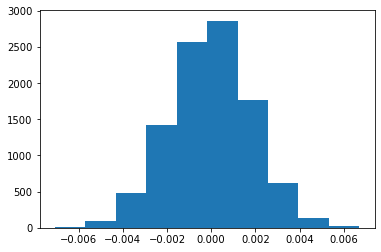

In [262]:
# i plot the hist for p_diffs
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [273]:
# Compute actual converted rate for two dataframe
actual_new = df2[(df2['converted'] == 1) & (df2['group'] == 'treatment')]['user_id'].count() / df2[df2['group'] == 'treatment']['user_id'].count()


actual_old = df2[(df2['converted'] == 1) & (df2['group'] == 'control')]['user_id'].count() / df2[df2['group'] == 'control']['user_id'].count()


In [274]:
# Compute obs 
obs = actual_new - actual_old
obs

-0.0015782389853555567

In [277]:
# compute p-value
(p_diffs > obs).mean()

0.802

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [254]:
import statsmodels.api as sm

# number of conversions for old pages
convert_old = df2[(df2['group'] == 'control')&(df2['converted'] == 1)]['user_id'].nunique()

# number of conversions for new pages
convert_new = df2[(df2['group'] == 'treatment')&(df2['converted'] == 1)]['user_id'].nunique()

#number of individuals who received old page
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()

#number of individuals who received new page
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [283]:
#copute z-score and p-value
(z_score , p_value) = sm.stats.proportions_ztest([convert_new,convert_old] , [n_new,n_old] , alternative='larger')
(z_score , p_value)

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [289]:
#create intercept to use it in fit and dummy variable for page each user received
# ab_page for treatment == 1 
# a_page for control == 1  
df2['intercept'] = 1
df2[['a_page', 'ab_page']] = pd.get_dummies(df2["group"])
df2.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,a_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [292]:
# i drop it [a_page] col

df2.drop(['a_page'] , axis=1)


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [293]:
# fit model 
lm = sm.Logit(df2['converted'] , df2[['intercept' , 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [294]:
#  show summary of model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        02:01:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<b><ul>
    <li>The p-value associated with ab_page is 0.190 here.</li>
<li>this differs from Part II as the test for Part II was based on a hypothesis that one page versus another had a higher rate of conversion.</li>
<li>Alternative hypotheses is that there is difference between between the treatment and control group.</li>
</ul></b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**More factors should be incorporated into the model, since the current hypotheses only incorporated a single factor for conversion, the type of page,  we should get more factors to predect so we can get more accurate result .**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [298]:
# read , load dataset and merge it
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [236]:
# what the unique value in country
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [299]:
### Create the necessary dummy variables
df_new[['US','UK','CA']]= pd.get_dummies(df_new['country'])

In [300]:
# add intercept column in new dataframe
df_new['intercept']=1

In [301]:
# check new dataframe 
df_new.head(1)

,country,timestamp,group,landing_page,converted,intercept,a_page,ab_page,US,UK,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [302]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new.converted , df_new[["intercept",'ab_page','UK','CA']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        02:21:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Based on the p-values above, it also does not appear as though country has a significant impact on conversion.**

In [304]:
# fit the two new cloumns in the model and show summary
df_new['CA_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_page'] = df_new['UK']*df_new['ab_page']
logit_mod = sm.Logit(df_new.converted, df_new[['intercept', 'CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:               1.082e-05
Time:                        02:29:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
CA_page       -0.0144      0.012     -1.155      0.248      -0.039       0.010
UK_page        0.0112      0.018      0.626      0.532      -0.024       0.046
==============================================================================
"""

**Based on the above, one p-value does present as statistically significant: the interaction of CA and ab_page (0.248 < 0.05).**